In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

In [41]:
import time

start_time = time.time()

In [42]:
df = pd.read_csv('adult.data', sep=',', header=None) #training data
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [43]:
df.shape


(32561, 15)

In [44]:
column_names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status","occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "agrossincome"]  # Replacing numbers with var names for easier readibility and interpretation
df.columns = column_names

In [45]:
df.dtypes #check


age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
agrossincome      object
dtype: object

In [46]:
df.describe() 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [47]:
df.describe(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,agrossincome
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [48]:
df.isnull().sum() #double checking from adult.names file where it was mentioned all missing data replaced by "?"

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
agrossincome      0
dtype: int64

<Axes: xlabel='agrossincome', ylabel='count'>

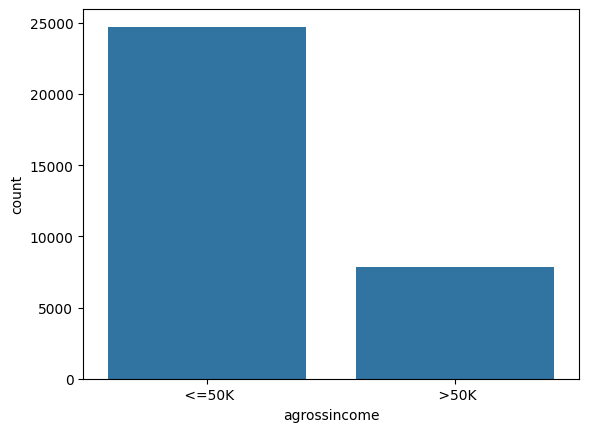

In [49]:
sns.countplot(x="agrossincome", data = df) #distribution of target variable

In [50]:
df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces
print(df.columns)


if 'agrossincome' in df.columns:
    Y = df['agrossincome']
else:
    print("Column 'agrossincome' still not found after stripping. Available columns:", df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'agrossincome'],
      dtype='object')


In [51]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder #double check encoder documentation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [52]:
test_data = pd.read_csv('adult.test', sep=',', header=None)   #Note: The first line |1x3 Cross validator has been revmoed from the dataset prior to loading and preprocessing

In [53]:
test_data.shape

(16281, 15)

In [54]:
test_data.columns = column_names
test_data.dtypes #check

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
agrossincome      object
dtype: object

In [55]:
X_train = df.iloc[:, :-1]  # Features for training (all columns except the last)
y_train = df.iloc[:, -1]   # Target for training (the last column)

X_test = test_data.iloc[:, :-1]    # Features for testing (all columns except the last)
y_test = test_data.iloc[:, -1]     # Target for testing (the last column)



In [56]:
X_train = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]  # Features for training
y_train = df['agrossincome']  # Target for training

X_test = test_data[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]  # Features for testing
y_test = test_data['agrossincome']  # Target for testing

# Strip any leading or trailing whitespace or dots from the target variable
y_train = y_train.str.strip()
y_test = y_test.str.strip()

# Ensure there are no inconsistencies in labels (e.g., extra punctuation or spaces)
y_train = y_train.replace({r'\.$': ''}, regex=True)
y_test = y_test.replace({r'\.$': ''}, regex=True)

#for target var
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


# Define the preprocessing steps for numeric and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', KNNImputer()),  # KNN Imputation for numeric features
            ('scaler', StandardScaler())  # Standard scaling for numeric features
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values with the most frequent category
            ('encoder', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding for categorical features #check documentation
        ]), categorical_features)
    ])

# Define a pipeline to apply preprocessing and then train the KNN classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'preprocessor__num__imputer__n_neighbors': [3, 5, 7],  # Number of neighbors for KNN Imputer
    'classifier__n_neighbors': [3, 5, 7]  # Number of neighbors for KNN Classifier
}

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy') #had to change from cv=5 because was too slow

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")




Best parameters: {'classifier__n_neighbors': 7, 'preprocessor__num__imputer__n_neighbors': 3}
Best cross-validation accuracy: 0.8353860002009195


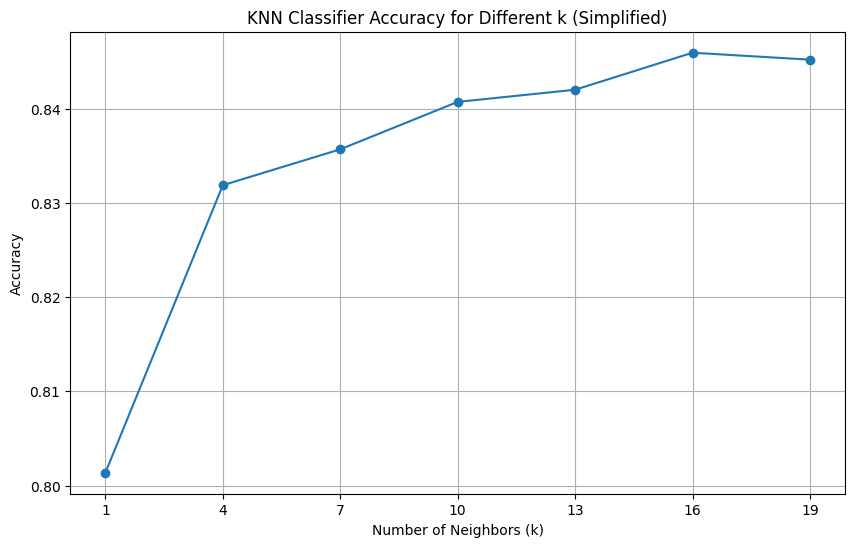

In [57]:
from sklearn import metrics
from sklearn.exceptions import NotFittedError

# Ensure pipeline is fit on the training data
pipeline.fit(X_train, y_train_encoded)

#Preprocess data using the pipeline (since the pipeline has been fitted already)
X_train_preprocessed = pipeline.named_steps['preprocessor'].transform(X_train)
X_test_preprocessed = pipeline.named_steps['preprocessor'].transform(X_test)

# Initialize an array to store the mean accuracies for different values of k

k_values = list(range(1, 21, 3))
mean_acc = np.zeros(len(k_values))

# Loop over different values of n_neighbors (every 3rd from 1 to 20)
for idx, k in enumerate(k_values):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_preprocessed, y_train_encoded)  # Use the encoded target variable
    
    # Predict on the test set
    yhat = knn.predict(X_test_preprocessed)
    
    # Calculate accuracy and store it
    mean_acc[idx] = metrics.accuracy_score(y_test_encoded, yhat)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_acc, marker='o', linestyle='-')
plt.xticks(k_values)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Classifier Accuracy for Different k (Simplified)')
plt.grid()
plt.show()


In [58]:
#searching for best n_neighbours for KNeighborsClassifier 
grid_params_k = { 
    'classifier__n_neighbors': [5, 9, 13, 16, 17, 21],  # Number of neighbors for KNN Classifier
}

# Set a basic KNN classifier pipeline
gs_k = GridSearchCV(grid_search.best_estimator_, grid_params_k, verbose=1, cv=3, n_jobs=-1)

# Fit the model to find the best k
gs_k.fit(X_train, y_train_encoded)

# Get the best k from the search
best_k = gs_k.best_params_['classifier__n_neighbors']
print(f"Best n_neighbors (k) found: {best_k}")

# Best cross-validation score
best_cv_score_k = gs_k.best_score_
print(f"Best cross-validation score for n_neighbors: {best_cv_score_k * 100:.2f}%")




Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best n_neighbors (k) found: 17
Best cross-validation score for n_neighbors: 84.16%


In [59]:

# tune only the weights and metric while keeping the best n_neighbors (k) fixed
grid_params_weight_metrics = { 
    'classifier__weights': ['uniform', 'distance'],  # Weight strategy
    'classifier__metric': ['minkowski', 'euclidean', 'manhattan']  # Distance metrics
}

# Create a new grid search using the best k found above
gs_weights_metrics = GridSearchCV(grid_search.best_estimator_, grid_params_weight_metrics, verbose=1, cv=3, n_jobs=-1)

# Fit the model to find the best combination of weights and metric
gs_weights_metrics.fit(X_train, y_train_encoded)



Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=3)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'fnlwgt',
                                                                          'education-num',
                                                                          'capital-gain',
                                                                          'capital-loss',
                                                                          'hours-per-week']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('encoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['workclass',
                                                                          'education',
                                                                          'marital-status',
                                                                          'occupation',
                                                                          'relationship',
                                                                          'race',
                                                                          'sex',
                                                                          'native-country'])])),
                                       ('classifier',
                                        KNeighborsClassifier(n_neighbors=7))]),
             n_jobs=-1,
             param_grid={'classifier__metric': ['minkowski', 'euclidean',
                                                'manhattan'],
                         'classifier__weights': ['uniform', 'distance']},
             verbose=1)

In [60]:
# Get the best combination of weights and metric
best_weights = gs_weights_metrics.best_params_['classifier__weights']
best_metric = gs_weights_metrics.best_params_['classifier__metric']
print(f"Best weights: {best_weights}, Best metric: {best_metric}")

# Best cross-validation score for weights/metric
best_cv_score_wm = gs_weights_metrics.best_score_
print(f"Best cross-validation score for weights/metric: {best_cv_score_wm * 100:.2f}%")

# Get the best estimator from the second grid search (weights and metrics tuning)
best_model_knn = gs_weights_metrics.best_estimator_

# Use the pipeline (best_model_knn) directly for prediction
y_hat = best_model_knn.predict(X_train)

# Print the training accuracy score
print("Training Accuracy Score:", accuracy_score(y_train_encoded, y_hat))  # test set accuracy


# Evaluate on the test set with the best weights and metric
y_test_pred_wm = gs_weights_metrics.best_estimator_.predict(X_test)
test_accuracy_wm = accuracy_score(y_test_encoded, y_test_pred_wm)
print(f"Test accuracy with best weights/metric: {test_accuracy_wm * 100:.2f}%")


Best weights: uniform, Best metric: minkowski
Best cross-validation score for weights/metric: 83.54%
Training Accuracy Score: 0.8742667608488682
Test accuracy with best weights/metric: 83.57%


In [61]:
from sklearn.metrics import classification_report
# Use the best hyperparameters found
model_knn = KNeighborsClassifier(n_neighbors=17, weights='uniform', metric='minkowski')

# Fit the model on the training set
model_knn.fit(X_train_preprocessed, y_train_encoded)

# Predict on the test set
y_pred_knn = model_knn.predict(X_test_preprocessed)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test_encoded, y_pred_knn)) #test set accuracy
print(classification_report(y_test_encoded, y_pred_knn))


Accuracy Score: 0.8447884036607088
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     12435
           1       0.70      0.61      0.65      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.76      0.78     16281
weighted avg       0.84      0.84      0.84     16281



In [62]:
from sklearn.metrics import confusion_matrix

# Confusion matrix for the test set
print(confusion_matrix(y_test_encoded, y_pred_knn))


[[11407  1028]
 [ 1499  2347]]


In [63]:
from sklearn.model_selection import cross_val_score

# Perform 3-fold cross-validation on the preprocessed training data
scores = cross_val_score(model_knn, X_train_preprocessed, y_train_encoded, cv=3)

# Print the average accuracy from cross-validation
print('Model accuracy from cross-validation: ', np.mean(scores))


Model accuracy from cross-validation:  0.8415283809053467


In [64]:
end_time = time.time()
total_time = end_time - start_time
print(f"Total time spent: {total_time:.2f} seconds")

Total time spent: 1069.28 seconds
